In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from get_processed_data import get_processed_data
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sampling import undersample, oversample, smote, ncr
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [2]:
df4, X_train, y_train, X_val, y_val, X_test, y_test = get_processed_data()

Training set shape: (12335, 55) (12335,)
Validation set shape: (1542, 55) (1542,)
Test set shape: (1542, 55) (1542,)


In [3]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_smote, y_smote = smote(X_train, y_train)
X_over, y_over = oversample(X_train, y_train)
X_under, y_under = undersample(X_train, y_train)
X_smote_scaled = scaler.transform(X_smote)
X_over_scaled = scaler.transform(X_over)
X_under_scaled = scaler.transform(X_under)

```No Sampling```

Lasso Coefficients: [-0.00119412 -0.00222395  0.00254811 -0.00010756  0.00019836  0.0019652
 -0.00028617 -0.00024769 -0.00262895  0.00837765 -0.00169703 -0.00131041
 -0.00109557 -0.00168233 -0.003712    0.00246125  0.00178574 -0.00086804
  0.00044099  0.00463184 -0.00079063 -0.00072932 -0.00459867  0.00128333
 -0.00532793  0.00162643  0.00432124 -0.00122702  0.00111458  0.00357244
 -0.00159236 -0.00738294  0.03955185  0.01752479 -0.00631052 -0.01518828
 -0.00029565 -0.00220088  0.00443649 -0.00040308 -0.00459854 -0.00191671
 -0.00062556 -0.00209667 -0.00280765 -0.00380042 -0.00186032  0.00068078
 -0.00153044  0.00870562 -0.00167545 -0.00240651 -0.04924522  0.01608302
  0.0335242 ]
Accuracy: 0.9332036316472114
Confusion Matrix:
 [[1439    0]
 [ 103    0]]
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


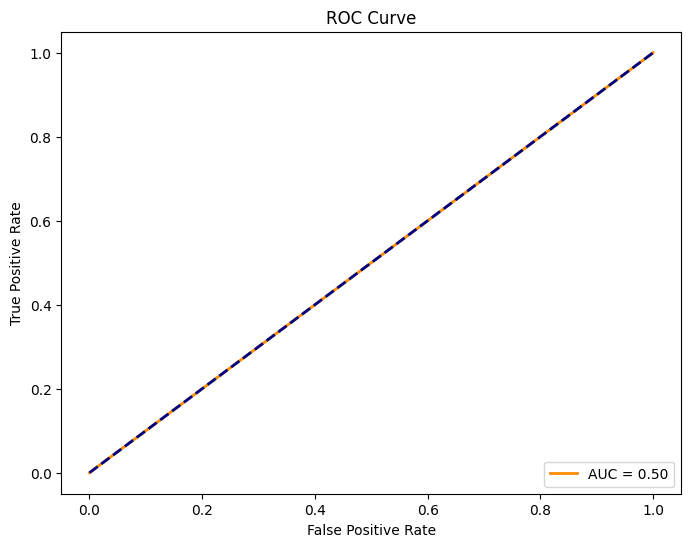

In [4]:
alpha_param = 0.01

ridge_model = Ridge(alpha=alpha_param)
ridge_model.fit(X_train_scaled, y_train)

print("Lasso Coefficients:", ridge_model.coef_)

y_pred = ridge_model.predict(X_test_scaled)
y_pred_binary = (y_pred > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred_binary)
conf_matrix = confusion_matrix(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_binary)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

```SMOTE```

Lasso Coefficients: [-0.00480118 -0.01856566 -0.0113983  -0.19163011 -0.19369348 -0.08809269
 -0.17854966 -0.16215428 -0.20771893 -0.07302533 -0.04835365 -0.04566194
 -0.01229839 -0.02611082 -0.07873404 -0.04550344 -0.03439194 -0.00867452
 -0.02054044 -0.00407688 -0.00664473 -0.00659065 -0.01344932 -0.01527359
 -0.00865691 -0.00905912 -0.00246335 -0.08737362 -0.05749617 -0.00688567
 -0.01950851  0.07881578  0.08740947  0.02264145 -0.02774996 -0.0490949
 -0.01448181 -0.01270449  0.01147352 -0.01592549 -0.00544015 -0.0015495
 -0.01773438 -0.0325108  -0.10436613 -0.01894154 -0.00691519 -0.00450621
 -0.00698273  0.02443319 -0.02208396 -0.02168348 -0.27090726 -0.112231
 -0.07551618]
Accuracy: 0.9273670557717251
Confusion Matrix:
 [[1423   16]
 [  96    7]]
Precision: 0.30434782608695654
Recall: 0.06796116504854369
F1 Score: 0.11111111111111112


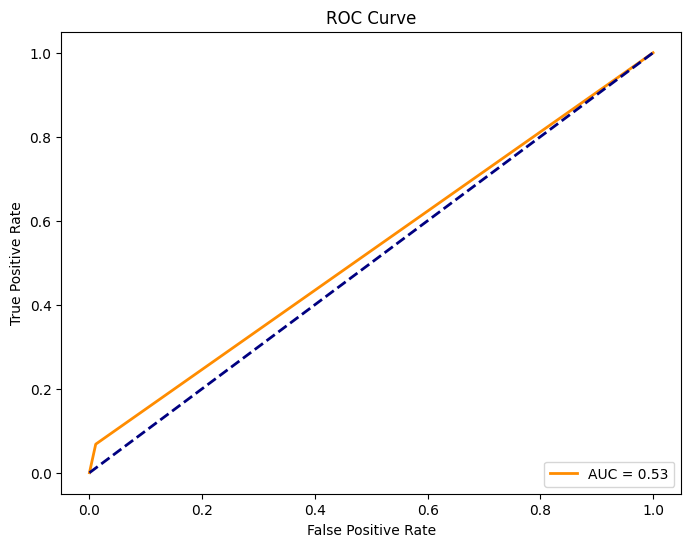

In [5]:
alpha_param = 0.01

# Create and train the Lasso regression model
ridge_model = Ridge(alpha=alpha_param)
ridge_model.fit(X_smote_scaled, y_smote)

print("Lasso Coefficients:", ridge_model.coef_)

y_pred = ridge_model.predict(X_test_scaled)
y_pred_binary = (y_pred > 0.5).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_binary)
conf_matrix = confusion_matrix(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_binary)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

```Over-Sampling```

Lasso Coefficients: [-0.00625137 -0.00819727  0.0101004  -0.00105466  0.00679128  0.00490875
 -0.00046355  0.00164739 -0.00676696  0.01755679 -0.00938305 -0.00719727
 -0.00608969 -0.00360045 -0.01829685  0.00575777  0.00387651 -0.0059621
 -0.00159086  0.00351462 -0.00490306 -0.00500245 -0.0090217   0.00898819
 -0.01506688  0.0075136   0.02106883 -0.00703228  0.00672484  0.00996047
 -0.00462907 -0.0569298   0.20810112  0.04538345 -0.02018464 -0.03807535
  0.00206517 -0.00832873  0.02206357 -0.00397401 -0.00810916 -0.00535138
 -0.00337501 -0.00428416  0.01917472 -0.00766258 -0.008999    0.00719995
 -0.00399601  0.04914148 -0.00820014 -0.00271462 -0.20329529  0.07876316
  0.12514981]
Accuracy: 0.6348897535667963
Confusion Matrix:
 [[886 553]
 [ 10  93]]
Precision: 0.14396284829721362
Recall: 0.9029126213592233
F1 Score: 0.24833110814419226


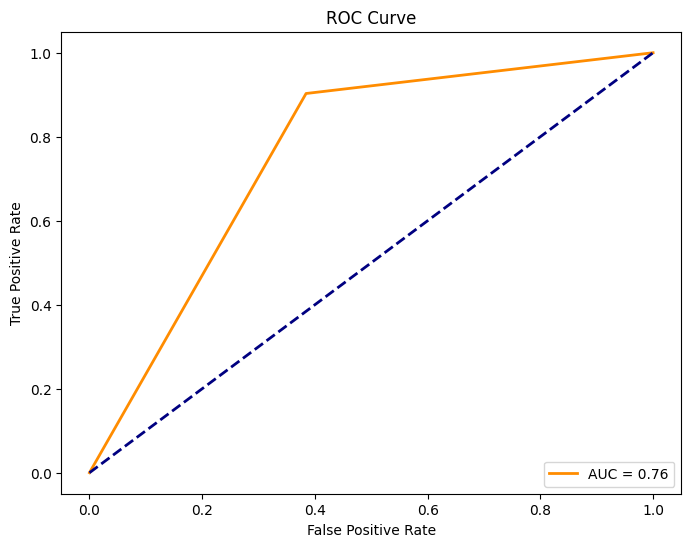

In [6]:
alpha_param = 0.01

ridge_model = Ridge(alpha=alpha_param)
ridge_model.fit(X_over_scaled, y_over)


print("Lasso Coefficients:", ridge_model.coef_)

y_pred = ridge_model.predict(X_test_scaled)
y_pred_binary = (y_pred > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred_binary)
conf_matrix = confusion_matrix(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_binary)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

```Undersampling```

Lasso Coefficients: [-9.52138876e-03 -1.86082823e-02  1.78953700e-02  3.05726107e-04
 -4.10537299e-03  5.35340179e-03  2.07764119e-03  1.43825561e-02
 -9.63273018e-03  1.52193138e-02 -1.31356045e-02 -1.01521900e-03
  0.00000000e+00 -8.24313044e-03 -1.63769220e-02  1.10134734e-04
  6.07947134e-03 -3.60768071e-29  8.82885192e-03  1.88499816e-03
  3.90016152e-29  3.90016152e-29 -9.77976549e-03 -3.68143393e-03
 -7.72383102e-03 -7.44149561e-03  1.66325660e-02 -1.49027566e-02
  1.49033948e-02  2.05170524e-02 -1.38327503e-02 -6.77333508e-02
  2.21559512e-01  3.50856729e-02 -2.66152415e-02 -2.58329595e-02
  3.08238586e-02  3.98773327e-03  3.51531146e-02 -8.52550970e-03
  1.23685444e-03 -1.98350796e-02  2.60713226e-03 -3.42300042e-02
  6.63804810e-02 -4.61100489e-04 -1.08389090e-02  1.30140594e-02
  1.22784903e-02  3.96038806e-02 -1.41050515e-02  9.18768607e-03
 -2.02470392e-01  7.74987500e-02  1.25653793e-01]
Accuracy: 0.6238651102464332
Confusion Matrix:
 [[868 571]
 [  9  94]]
Precision: 0.1

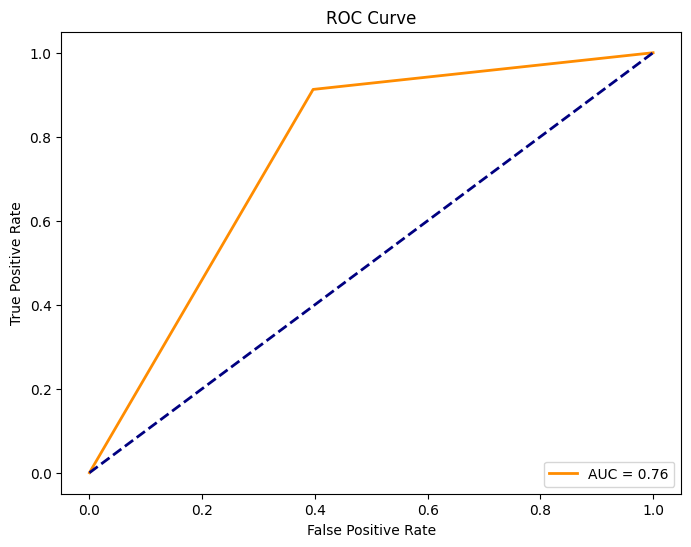

In [7]:
alpha_param = 0.01

ridge_model = Ridge(alpha=alpha_param)
ridge_model.fit(X_under_scaled, y_under)


print("Lasso Coefficients:", ridge_model.coef_)


y_pred = ridge_model.predict(X_test_scaled)
y_pred_binary = (y_pred > 0.5).astype(int)


accuracy = accuracy_score(y_test, y_pred_binary)
conf_matrix = confusion_matrix(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_binary)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()